In [1]:
# basics
import pandas as pd
import numpy as np
import time

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

# for simulations
from functools import partial
from multiprocessing import Pool
from scripts.functions import pick_random_dice, pick_random_score, pick_frequent_dice, pick_max_score, play_botzee

In [2]:
n_sims = 10**4

In [3]:
play_game_random = partial(
    play_botzee, 
    dice_function = pick_random_dice, 
    score_function = pick_random_score
)

play_game_frequent_max = partial(
    play_botzee, 
    dice_function = pick_frequent_dice,
    score_function = pick_max_score
)

## Test for optimal number of workers

,workers,time
0,2,3.213273
1,4,2.250680
2,6,1.962790
3,8,1.867604
4,10,1.810782
5,12,1.797454
6,14,1.788594
7,16,1.840203
8,18,1.930720
9,20,2.026165


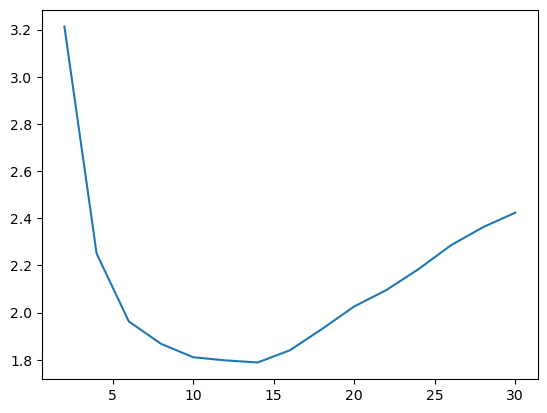

In [4]:
n_sims = 10**3

times = pd.DataFrame()

for workers in np.linspace(2, 30, 15):
    workers = int(workers)

    start = time.perf_counter()
    if __name__ == '__main__':
        with Pool(workers) as p:
            full_data = p.map(play_game_frequent_max, range(1, n_sims+1))
    end = time.perf_counter()

    result = pd.DataFrame({'workers': workers, 'time': end - start}, index=[0])
    times = pd.concat([times, result], ignore_index=True)

display(times)

plt.plot(times.workers, times.time)

In [5]:
workers = 10

if __name__ == '__main__':
    with Pool(workers) as p:
        full_data = p.map(play_game_frequent_max, range(1, n_sims+1))

full_data = [turn for game in full_data for turn in game]

In [6]:
training_df = pd.DataFrame(full_data)

training_df

,game,turn,pre_total_score,chance_score,ones_score,twos_score,threes_score,fours_score,fives_score,sixes_score,...,sixes_potential_3,three_kind_potential_3,four_kind_potential_3,full_house_potential_3,small_straight_potential_3,large_straight_potential_3,yahtzee_potential_3,score_pick,turn_score,post_total_score
0,1,1,0,-1,-1,-1,-1,-1,-1,-1,...,0,21,0,25,0,0,0,full_house,25,25
1,1,2,25,-1,-1,-1,-1,-1,-1,-1,...,0,12,0,-1,0,0,0,chance,12,37
2,1,3,37,12,-1,-1,-1,-1,-1,-1,...,18,21,0,-1,0,0,0,three_kind,21,58
3,1,4,58,12,-1,-1,-1,-1,-1,-1,...,18,-1,0,-1,0,0,0,sixes,18,76
4,1,5,76,12,-1,-1,-1,-1,-1,18,...,-1,-1,0,-1,0,0,0,threes,3,79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12995,1000,9,125,14,-1,-1,-1,8,10,12,...,-1,-1,-1,-1,-1,0,0,threes,9,134
12996,1000,10,134,14,-1,-1,9,8,10,12,...,-1,-1,-1,-1,-1,0,0,ones,2,136
12997,1000,11,136,14,2,-1,9,8,10,12,...,-1,-1,-1,-1,-1,0,0,twos,2,138
12998,1000,12,138,14,2,2,9,8,10,12,...,-1,-1,-1,-1,-1,0,0,large_straight,0,138


In [7]:
print(training_df.dtypes)

game                           int64
turn                           int64
pre_total_score                int64
chance_score                   int64
ones_score                     int64
                               ...  
large_straight_potential_3     int64
yahtzee_potential_3            int64
score_pick                    object
turn_score                     int64
post_total_score               int64
Length: 83, dtype: object


c:\Users\Keith\miniconda3\envs\botzee\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Keith\miniconda3\envs\botzee\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


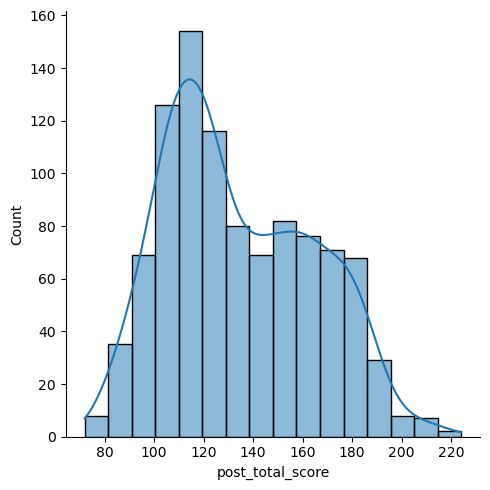

In [8]:
sns.displot(training_df[training_df.turn == 13].post_total_score, kde = True)

In [9]:
training_df.columns

Index(['game', 'turn', 'pre_total_score', 'chance_score', 'ones_score',
       'twos_score', 'threes_score', 'fours_score', 'fives_score',
       'sixes_score', 'three_kind_score', 'four_kind_score',
       'full_house_score', 'small_straight_score', 'large_straight_score',
       'yahtzee_score', 'hand_1_dice_1', 'hand_1_dice_2', 'hand_1_dice_3',
       'hand_1_dice_4', 'hand_1_dice_5', 'chance_potential_1',
       'ones_potential_1', 'twos_potential_1', 'threes_potential_1',
       'fours_potential_1', 'fives_potential_1', 'sixes_potential_1',
       'three_kind_potential_1', 'four_kind_potential_1',
       'full_house_potential_1', 'small_straight_potential_1',
       'large_straight_potential_1', 'yahtzee_potential_1', 'picks_1_dice_1',
       'picks_1_dice_2', 'picks_1_dice_3', 'picks_1_dice_4', 'picks_1_dice_5',
       'hand_2_dice_1', 'hand_2_dice_2', 'hand_2_dice_3', 'hand_2_dice_4',
       'hand_2_dice_5', 'chance_potential_2', 'ones_potential_2',
       'twos_potential_2', 't

In [10]:
training_df.shape

(13000, 83)

In [11]:
training_df.to_csv('data/training_df.csv', index = False)